<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_ED01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}

Primero determinamos el intervalo $t_0$ a $t_f$ para determinar $h$, sea $I = [0,10]$ donde $t_0 = 0$ y $t_f = 10$. Nuestra condición inicial sera $N_0 = 100$.

Nuestra función es:

\begin{equation}
f(x_0,y_0) = -λN
\end{equation}

y con $n = 1000$ tenemos:

\begin{equation}
h = \frac{x_f - x_o}{n} = 0.01
\end{equation}

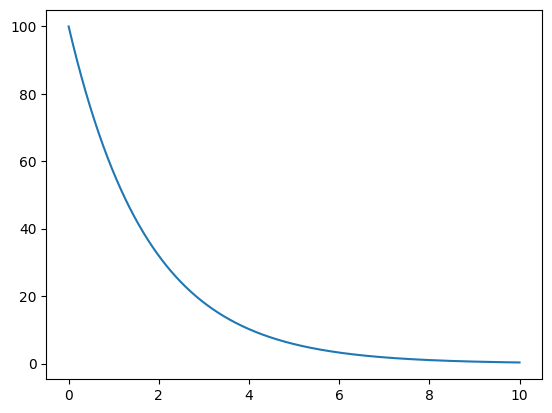

In [18]:
# Programación

x0 = 0
xf = 10
y0 = 100
n = 10000
c = 0.57
h = (xf-x0)/n

f = lambda N,t: -c*N

# Generación de X

X = np.zeros(n)

i = 0

while i < n:
  x1 = x0 + h
  X[i] = x1
  x0 = x1
  i = i + 1

# Generación de Y

Y = np.zeros(n)

j = 0

while j < n:
  y1 = y0 + h*f(y0,X[j])
  Y[j] = y1
  y0 = y1
  j = j + 1


Xr = np.linspace(0,xf,100)
fun = lambda x: np.exp(-x*c)*100
Yr = fun(Xr)

plt.plot(X,Y)
# plt.plot(Xr,Yr)

In [19]:
# Modo Función

def euler_edo(y0,x0,xf,n,f):

  h = (xf-x0)/n

  # Generación de X

  X = np.zeros(n)
  i = 0

  while i < n:
   x1 = x0 + h
   X[i] = x1
   x0 = x1
   i = i + 1

# Generación de Y

  Y = np.zeros(n)

  j = 0

  while j < n:
   y1 = y0 + h*f(y0,X[j])
   Y[j] = y1
   y0 = y1
   j = j + 1

  graf = np.array([X,Y])

  return graf



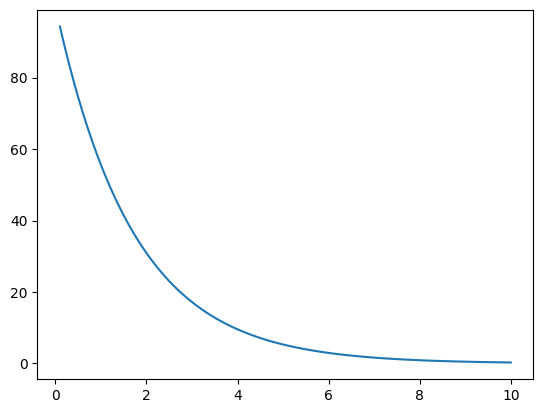

In [20]:
x0 = 0
xf = 10
y0 = 100
n = 100

f = lambda N,t: -0.57*N

Xp = euler_edo(y0,x0,xf,n,f)[0]
Yp = euler_edo(y0,x0,xf,n,f)[1]

plt.plot(Xp,Yp)

# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación difirencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


Para el oscilador aromónico anterior, escribir un programa con extension py que permita dar escribir la velocidad y la posicion
como funcion del tiempo.

La ejecucion del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


# Método RK4

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}

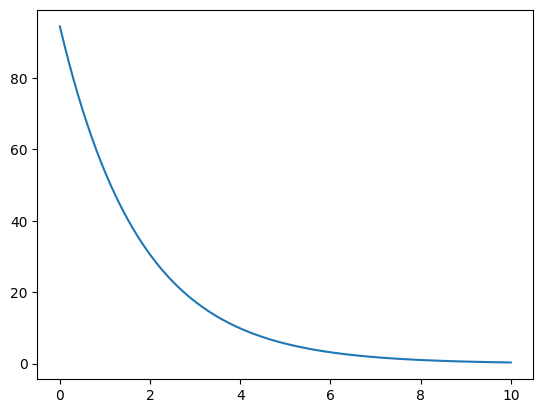

In [21]:
t0 = 0
tf = 10
y0 = 100
n = 100
c = 0.57
h = (xf-x0)/n

t = np.linspace(t0,tf,n)
y = np.zeros(len(t))

f = lambda t,N : -c*N

for i in range(0,len(t)):

 k1 = f(t[i],y0)
 k2 = f(t[i] + 0.5*h, y0 + 0.5*k1*h)
 k3 = f(t[i] + 0.5*h, y0 + 0.5*k2*h)
 k4 = f(t[i] + h, y0 + k3*h)

 y1 = y0 + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)

 y[i] = y1

 y0 = y1

plt.plot(t,y)

In [23]:
# Modo Función

def edo_rk4(y0,t0,tf,n,f):

  h = (xf-x0)/n
  t = np.linspace(t0,tf,n)
  y = np.zeros(len(t))

  f = lambda t,N : -c*N

  for i in range(0,len(t)):

   k1 = f(t[i],y0)
   k2 = f(t[i] + 0.5*h, y0 + 0.5*k1*h)
   k3 = f(t[i] + 0.5*h, y0 + 0.5*k2*h)
   k4 = f(t[i] + h, y0 + k3*h)

   y1 = y0 + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)

   y[i] = y1

   y0 = y1

  graf = np.array([t,y])
  return graf

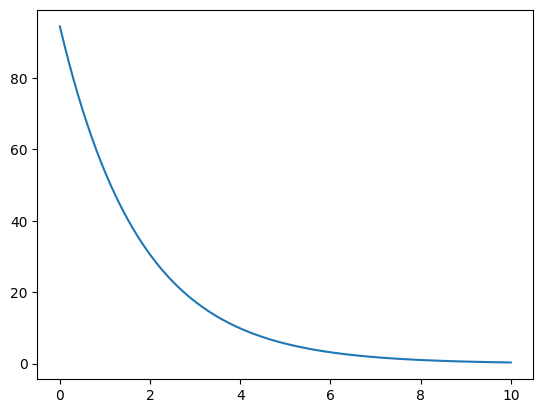

In [24]:
x0 = 0
xf = 10
y0 = 100
n = 100

f = lambda t,N: -0.57*N

t = edo_rk4(y0,t0,tf,n,f)[0]
y = edo_rk4(y0,t0,tf,n,f)[1]

plt.plot(t,y)

# Método RK4 para grado 2

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}

In [43]:
m = 2
k = 4
b = 1
x0 = 1.5
v0 = 0
t0 = 0
tf = 8
n = 100
|